In [1]:
#kidney annotation
import os
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response/code')
import anndata as ad
import scanpy as sc
import os
import pandas as pd
import numpy as np
import useful_functions as uf
import scvi
import scvelo as scv
sc.set_figure_params(figsize=(6, 6), dpi = 150, fontsize = 10)
import sys
print(sys.executable)
import matplotlib as mpl
import matplotlib.pyplot as plt
import celltypist as ctp

from datetime import datetime
print(datetime.now(tz=None))

Global seed set to 0
/home/jovyan/my-conda-envs/myenv/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/jovyan/my-conda-envs/myenv/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


/home/jovyan/my-conda-envs/myenv/bin/python
2023-07-17 12:04:24.821056


In [2]:
import warnings
warnings.filterwarnings('ignore')
#this will hide the awful pandas deprec warnings that are currently plaguing scanpy

#now print versions
print(sc.__version__)
print(ad.__version__)
print(pd.__version__)
print(scvi.__version__)
print(scv.__version__)
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response')

1.9.1
0.8.0
1.5.1
0.19.0
0.2.5


In [3]:
os.chdir('/lustre/scratch126/cellgen/team297/bs16/current_projects/kidney_glomTI_response')
adata = sc.read_h5ad("./data/annotated/perfusion_sortseq.h5ad")

In [4]:
adata.uns['IC_status_colors'] = ['purple', 'darkblue', 'grey']
adata.uns['stimulation_colors'] = ['red', 'grey']
adata.uns['compartment_colors'] = ['orange', 'blude']

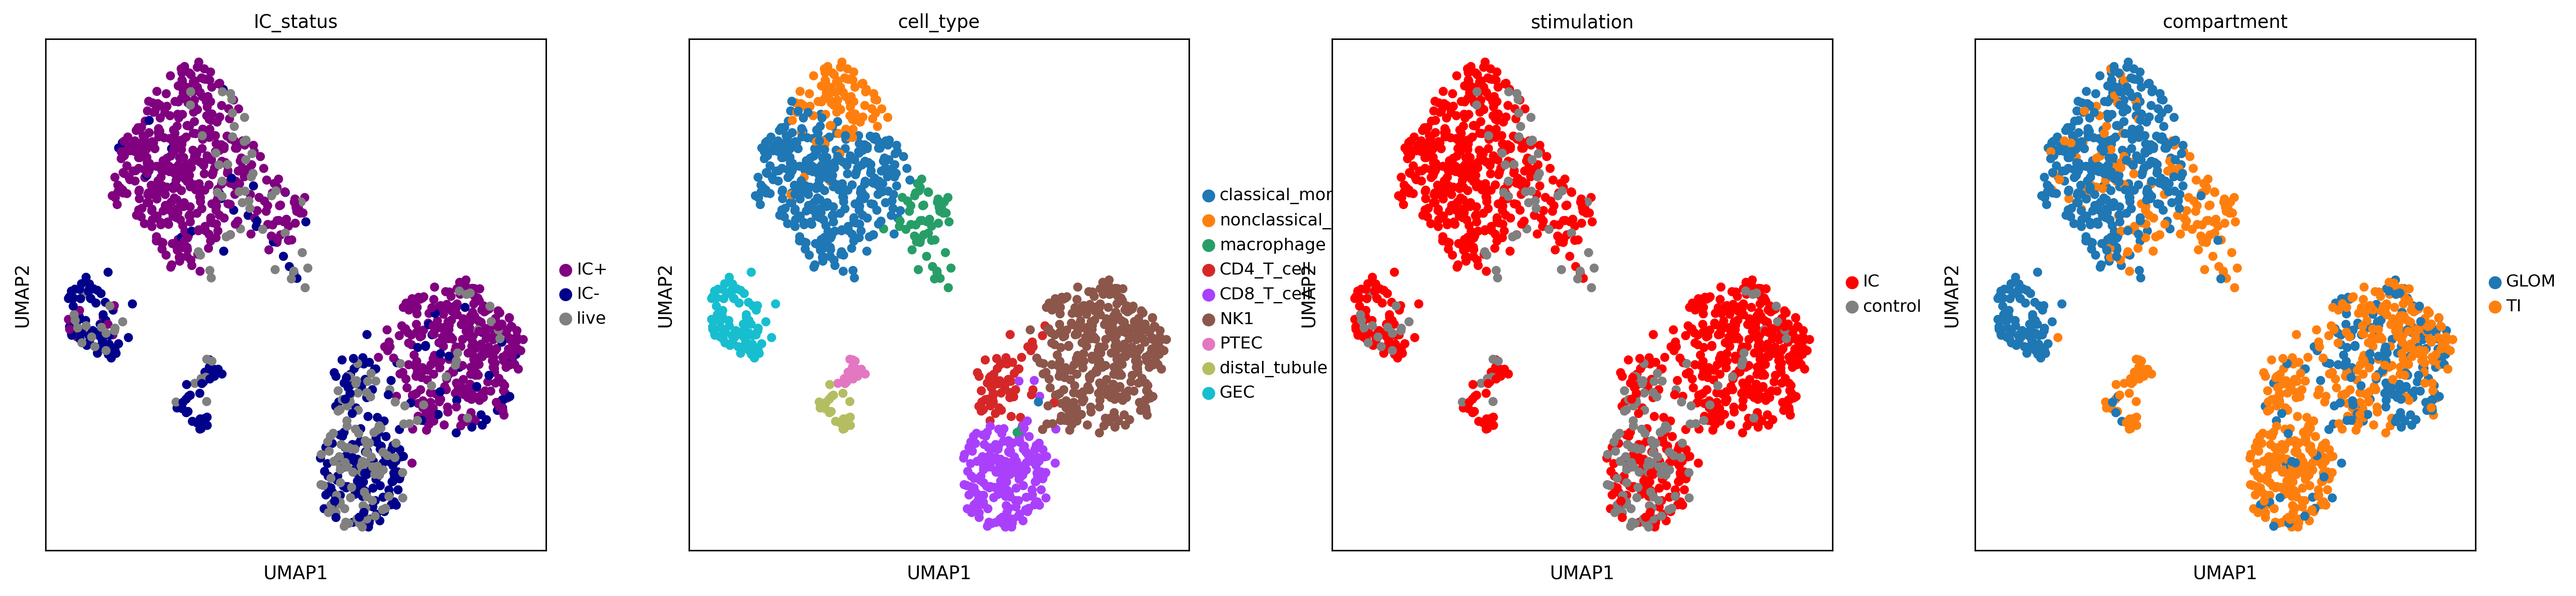

In [5]:
sc.set_figure_params(figsize=(5,5), dpi = 150, fontsize = 10, vector_friendly = False)
sc.pl.umap(adata, color = ['IC_status', 'cell_type', 'stimulation', 'compartment'], add_outline = False, save = 'sort_seq_umaps.pdf')

In [6]:
#get the monocyte response signature
monocyte_response = np.array(pd.read_csv('data/da_results/perfusion/response_signatures/classical_monocyte_tf_refined_geneset.csv', index_col = 0).x)
GEC_response = np.array(pd.read_csv('data/da_results/perfusion/response_signatures/GEC_tf_refined_geneset.csv', index_col = 0).x)
NK1_response = np.array(pd.read_csv('data/da_results/perfusion/response_signatures/NK1_tf_refined_geneset.csv', index_col = 0).x)

In [7]:
sc.tl.score_genes(adata, gene_list =monocyte_response, score_name = 'monocyte_response' )
sc.tl.score_genes(adata, gene_list =GEC_response, score_name = 'GEC_response' )
sc.tl.score_genes(adata, gene_list =NK1_response, score_name = 'NK1_response' )

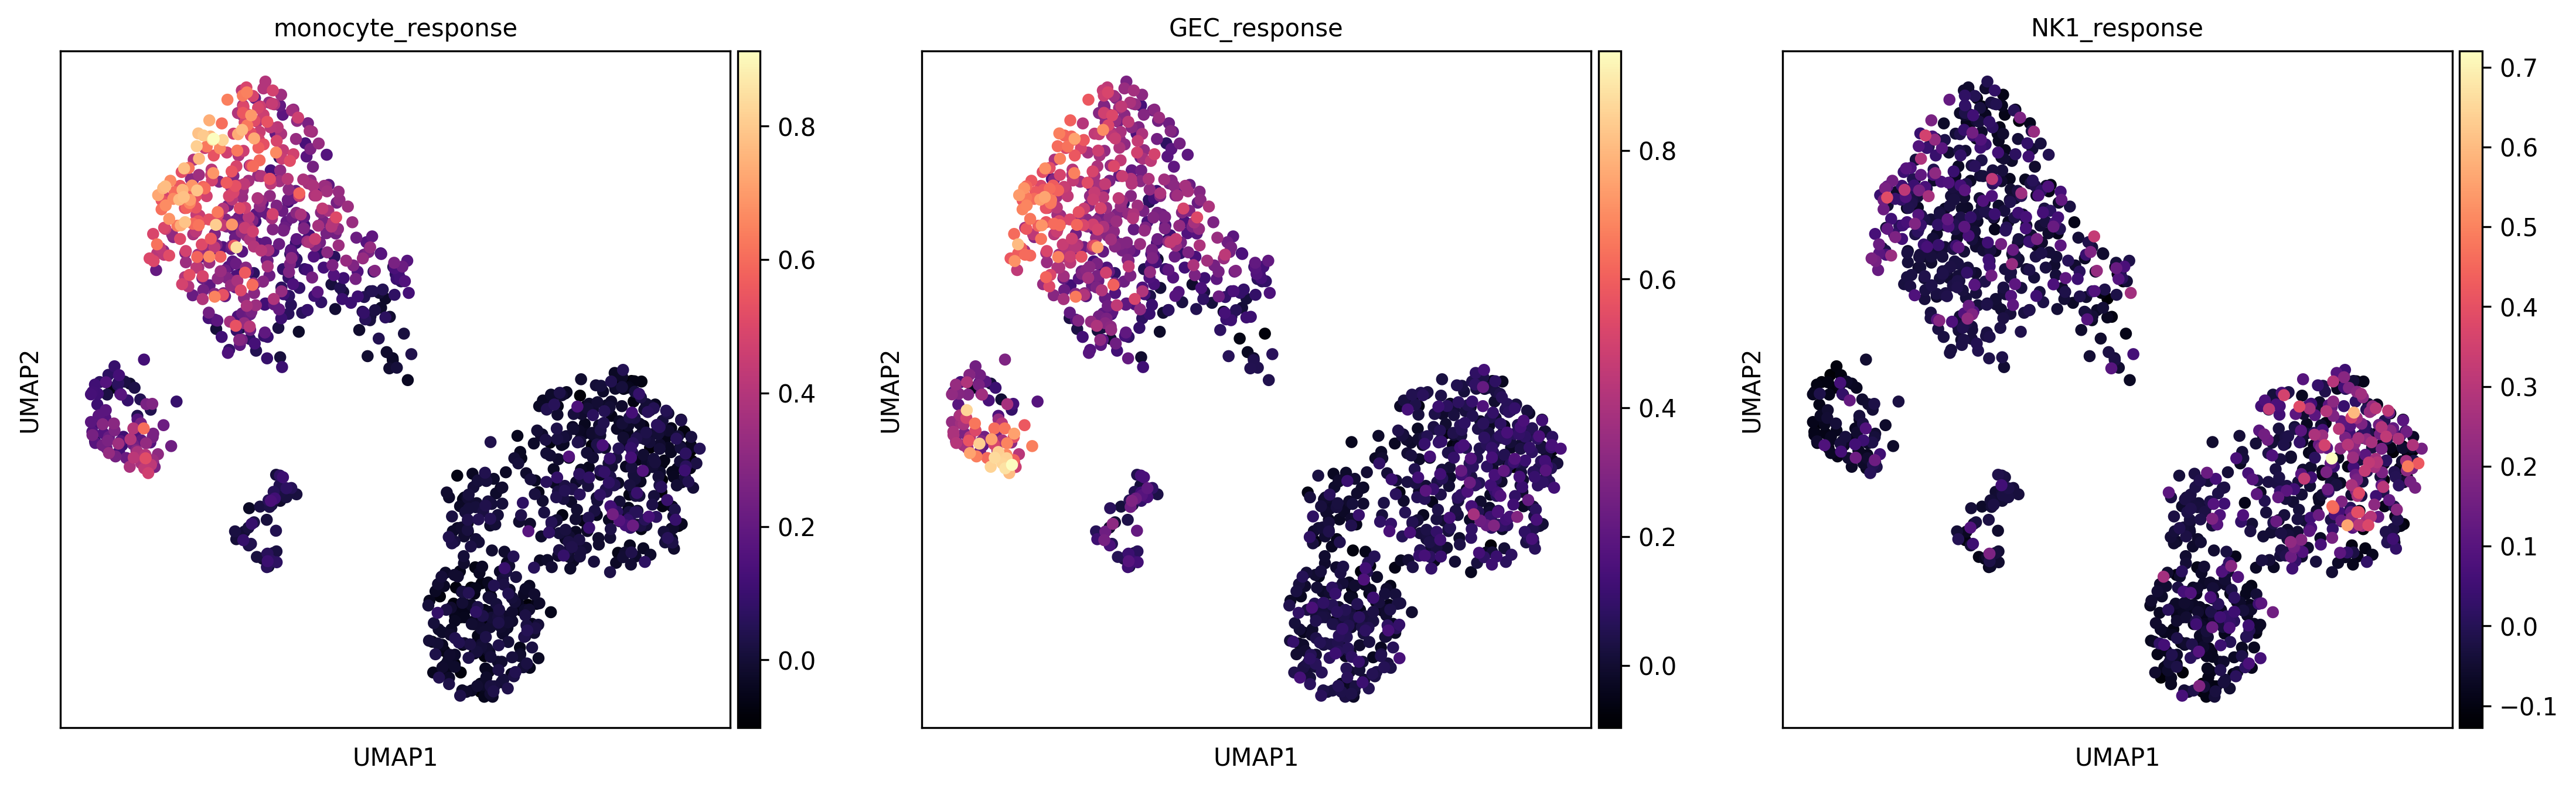

In [8]:
sc.pl.umap(adata, color = ['monocyte_response', 'GEC_response', "NK1_response"], cmap = 'magma')

In [9]:
adata.obs['cell_type_stim'] = pd.Categorical(np.array(adata.obs['cell_type']) + "_" + np.array(adata.obs['IC_status']))

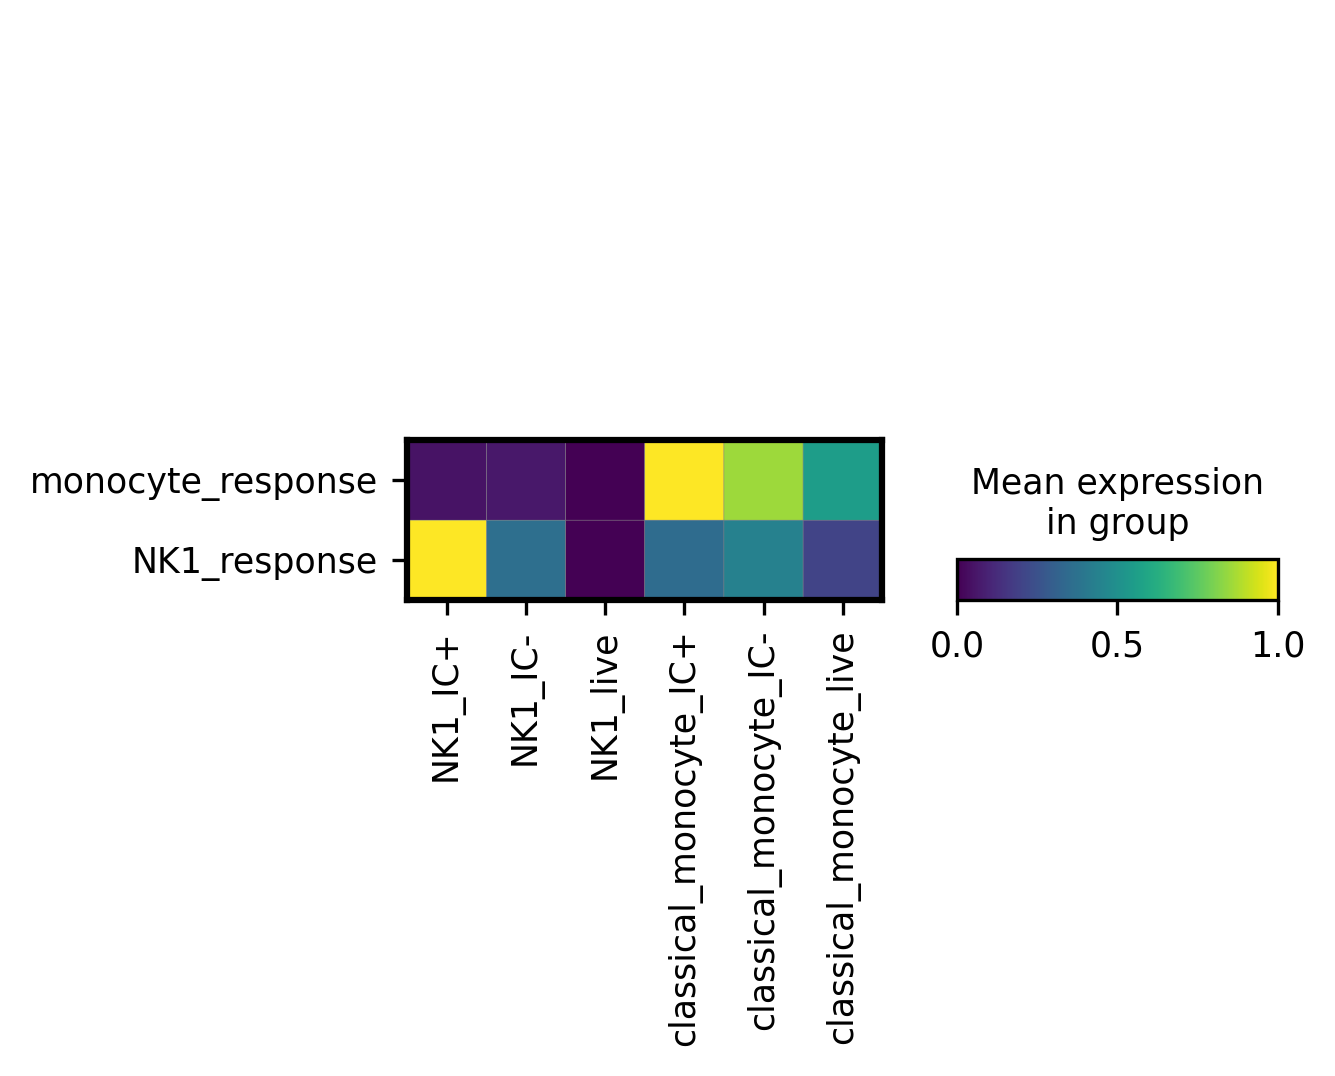

In [10]:
sc.pl.matrixplot(adata[adata.obs['cell_type'].isin(['classical_monocyte', 'NK1'])], 
            var_names = ['monocyte_response', 'NK1_response'], groupby = 'cell_type_stim', 
                standard_scale = 'var', swap_axes = True, save = 'sortseq_response_vs_IC.pdf')